In [7]:
import pandas as pd
import numpy as np
data=pd.read_csv('Companies-profit.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,City,Profit
0,165349.20,136897.80,471784.10,Mumbai,192261.83
1,162597.70,151377.59,443898.53,Bangalore,191792.06
2,153441.51,101145.55,407934.54,Delhi,191050.39
3,144372.41,118671.85,383199.62,Mumbai,182901.99
4,142107.34,91391.77,366168.42,Delhi,166187.94


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data.shape

(1000, 5)

In [10]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
City                object
Profit             float64
dtype: object

In [11]:
missing= data.isnull().sum().sort_values(ascending=False)
percent= (data.isnull().sum()/data.isnull().count())
total= pd.concat([missing, percent],axis=1, keys=["Total", "Percent"])
print(total)

                 Total  Percent
Profit               0      0.0
City                 0      0.0
Marketing Spend      0      0.0
Administration       0      0.0
R&D Spend            0      0.0


In [12]:
numeric= data.select_dtypes(include=[np.number])
numeric

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.800,471784.1000,192261.83000
1,162597.70,151377.590,443898.5300,191792.06000
2,153441.51,101145.550,407934.5400,191050.39000
3,144372.41,118671.850,383199.6200,182901.99000
4,142107.34,91391.770,366168.4200,166187.94000
...,...,...,...,...
995,54135.00,118451.999,173232.6695,95279.96251
996,134970.00,130390.080,329204.0228,164336.60550
997,100275.47,241926.310,227142.8200,413956.48000
998,128456.23,321652.140,281692.3200,333962.19000


In [13]:
categorical= data.select_dtypes(include=[np.object])
categorical

,City
0,Mumbai
1,Bangalore
2,Delhi
3,Mumbai
4,Delhi
...,...
995,Bangalore
996,Bangalore
997,Bangalore
998,Bangalore


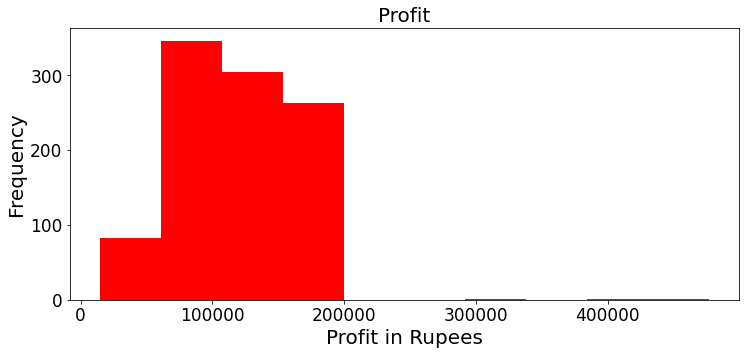

In [14]:
plt.figure(figsize=(12,5))
plt.hist(data["Profit"],color="red")
plt.title("Profit", size=20)
plt.ylabel("Frequency", size=20)
plt.xlabel("Profit in Rupees", size=20)
plt.tick_params(labelsize=17)
# plt.tick_params(labelsize=20)
# ax.xaxis.set_tick_params(labelsize=20)
# ax.yaxis.set_tick_params(labelsize=20)
plt.show()

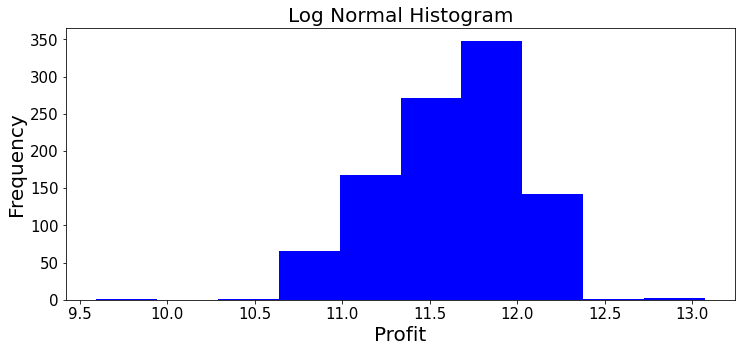

In [15]:
target= np.log(data["Profit"])
plt.figure(figsize=(12,5))
plt.hist(target, color="blue")
plt.xlabel("Profit", size=20)
plt.ylabel("Frequency", size=20)
plt.title("Log Normal Histogram", size=20)
plt.tick_params(labelsize=15)
plt.show()

In [16]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

In [17]:
y

array([192261.83   , 191792.06   , 191050.39   , 182901.99   ,
       166187.94   , 156991.12   , 156122.51   , 155752.6    ,
       152211.77   , 149759.96   , 146121.95   , 144259.4    ,
       141585.52   , 134307.35   , 132602.65   , 129917.04   ,
       126992.93   , 125370.37   , 124266.9    , 122776.86   ,
       118474.03   , 111313.02   , 110352.25   , 108733.99   ,
       108552.04   , 107404.34   , 105733.54   , 105008.31   ,
       103282.38   , 101004.64   ,  99937.59   ,  97483.56   ,
        97427.84   ,  96778.92   ,  96712.8    ,  96479.51   ,
        90708.19   ,  89949.14   ,  81229.06   ,  81005.76   ,
        78239.91   ,  77798.83   ,  71498.49   ,  69758.98   ,
        65200.33   ,  64926.08   ,  49490.75   ,  42559.73   ,
        35673.41   ,  14681.4    , 123485.2464 ,  82155.48418,
       125867.0108 , 104976.1696 ,  89803.10053,  75297.23305,
       114284.5283 , 171985.0761 ,  72337.96774, 169566.5772 ,
       158670.9451 , 114522.8756 ,  85842.60573, 101106

In [18]:
X.shape

(1000, 4)

In [19]:
correlation= numeric.corr()
correlation

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


In [20]:
correlation["Profit"].sort_values(ascending=False)*100

Profit             100.000000
R&D Spend           94.524529
Marketing Spend     91.727018
Administration      74.156027
Name: Profit, dtype: float64

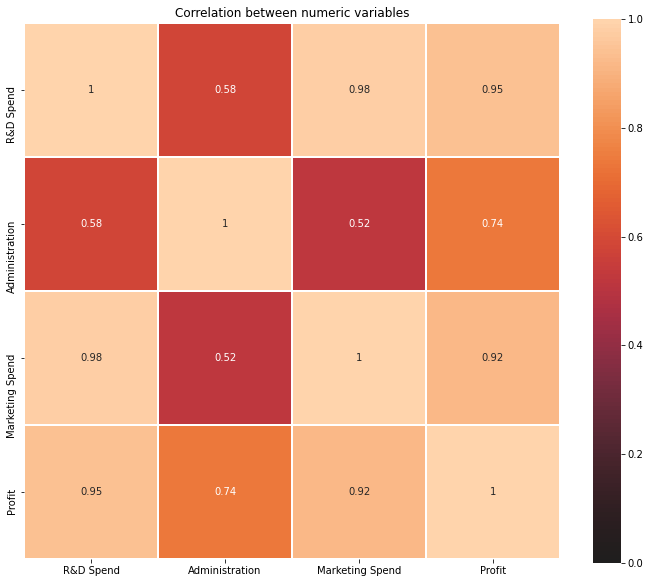

In [21]:
plt.subplots(figsize=(12,10))
plt.title("Correlation between numeric variables")
sns.heatmap(correlation, square=True, vmin=0, vmax=1, center=0, annot=True, linewidths=0.5)
plt.show()

c:\users\jagadish\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


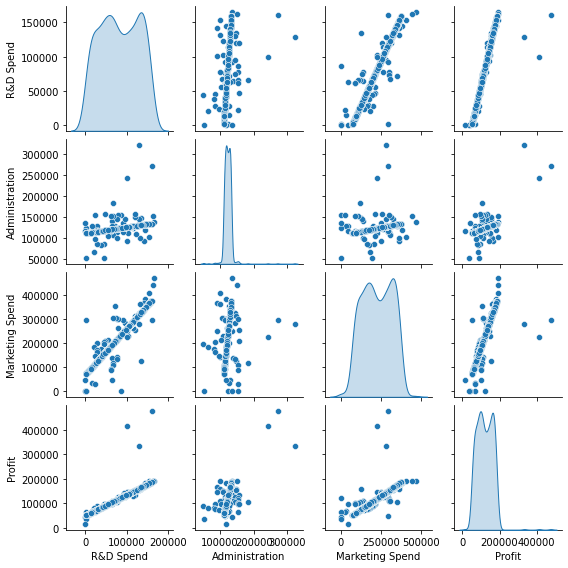

In [22]:
columns= ["R&D Spend", "Administration", "Marketing Spend", "Profit"]
sns.pairplot(data[columns],size=2, kind="scatter", diag_kind="kde")
plt.show()

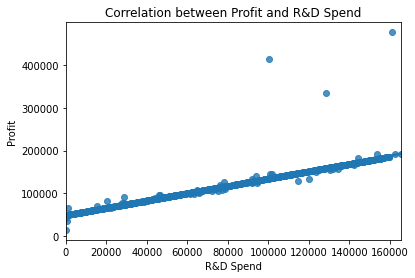

In [23]:
sns.regplot(x="R&D Spend", y="Profit", data=data)
plt.title("Correlation between Profit and R&D Spend")
plt.xlabel("R&D Spend")
plt.ylabel("Profit")

plt.show()

<AxesSubplot:xlabel='Marketing Spend', ylabel='Profit'>

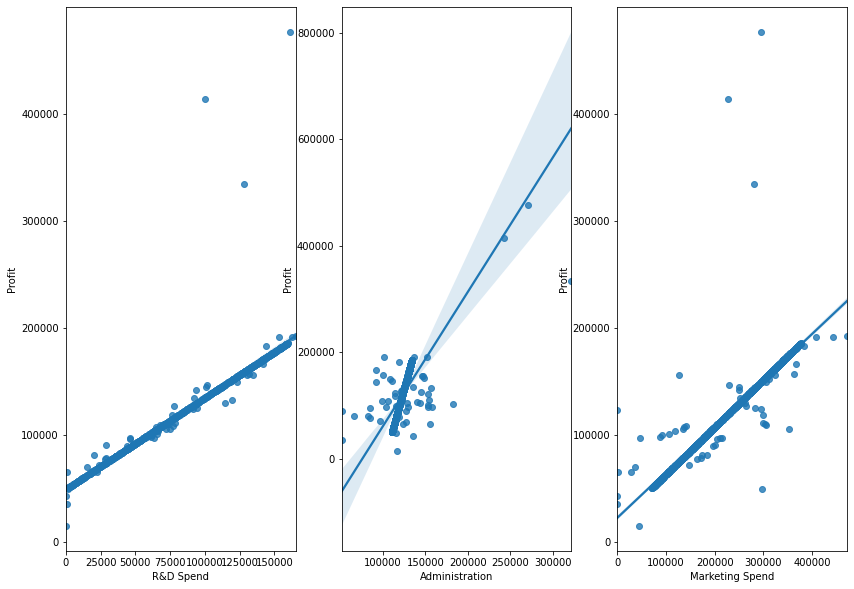

In [24]:
fig, axs = plt.subplots(ncols=3, figsize=(14,10))
sns.regplot(x='R&D Spend', y='Profit', scatter= True, data=data, ax=axs[0])
sns.regplot(x='Administration', y='Profit', scatter=True, data=data, ax=axs[1])
sns.regplot(x='Marketing Spend',y='Profit', scatter=True, data=data, ax=axs[2])

In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder= LabelEncoder()
X[:,3]= labelencoder.fit_transform(X[:, 3])

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=5)

In [27]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [28]:
pred= lm.predict(X_test)

In [29]:
print(lm.intercept_)
print(lm.coef_)

-83040.3025297069
[5.73760387e-01 1.14788348e+00 6.28383428e-02 2.68473855e+02]


In [30]:
list(zip(data, lm.coef_))

[('R&D Spend', 0.5737603874436824),
 ('Administration', 1.1478834832243088),
 ('Marketing Spend', 0.06283834277364653),
 ('City', 268.4738552853328)]

In [31]:
print("R square is {}:".format(lm.score(X_test,y_test)))

R square is 0.9648909018228169:


In [32]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [33]:
print("RMSE:", np.sqrt(metrics.mean_squared_error(pred, y_test)))

RMSE: 7481.645711203669


In [34]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

plt.style.use("ggplot")

from sklearn import naive_bayes

In [35]:
dataset = datasets.load_wine()
X = dataset.data; y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [36]:
model = naive_bayes.GaussianNB()
model.fit(X_train, y_train)
print(model)

GaussianNB()


In [37]:
expected_y  = y_test
predicted_y = model.predict(X_test)

In [38]:
print(metrics.classification_report(expected_y, predicted_y, target_names=dataset.target_names))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

     class_0       0.94      1.00      0.97        17
     class_1       1.00      0.94      0.97        16
     class_2       1.00      1.00      1.00        12

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[17  0  0]
 [ 1 15  0]
 [ 0  0 12]]


In [39]:
model = naive_bayes.MultinomialNB()
model.fit(X_train, y_train)
print(); 
print(model)


MultinomialNB()


In [40]:
expected_y  = y_test
predicted_y = model.predict(X_test)

In [41]:
print(metrics.classification_report(expected_y, predicted_y,target_names=dataset.target_names))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

     class_0       0.89      0.94      0.91        17
     class_1       0.93      0.88      0.90        16
     class_2       0.92      0.92      0.92        12

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45

[[16  1  0]
 [ 1 14  1]
 [ 1  0 11]]


In [42]:
import pandas as pd
import numpy as np 
import matplotlib as plt
%matplotlib inline
import seaborn as sns

In [43]:
df=pd.read_csv("Disease.csv")
df.head()

,Disease,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Disease  81 non-null     object
 1   Age      81 non-null     int64 
 2   Number   81 non-null     int64 
 3   Start    81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.3+ KB


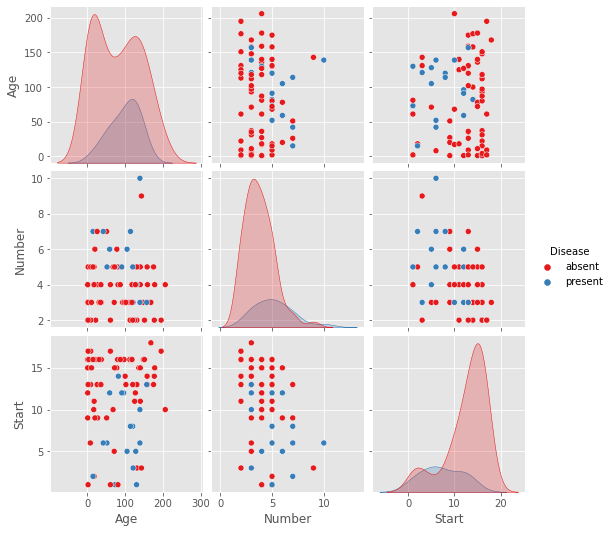

In [45]:
sns.pairplot(df, hue='Disease', palette='Set1')

In [46]:
from sklearn.model_selection import train_test_split
X=df.drop("Disease",axis=1)
y=df["Disease"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
from sklearn.tree import DecisionTreeClassifier

In [47]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [48]:
pred=dt.predict(X_test)
pred

array(['absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[22  1]
 [ 1  1]]
              precision    recall  f1-score   support

      absent       0.96      0.96      0.96        23
     present       0.50      0.50      0.50         2

    accuracy                           0.92        25
   macro avg       0.73      0.73      0.73        25
weighted avg       0.92      0.92      0.92        25



In [51]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
pred_rf=rf.predict(X_test)
pred_rf

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [53]:
print(confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))

[[22  1]
 [ 2  0]]
              precision    recall  f1-score   support

      absent       0.92      0.96      0.94        23
     present       0.00      0.00      0.00         2

    accuracy                           0.88        25
   macro avg       0.46      0.48      0.47        25
weighted avg       0.84      0.88      0.86        25



In [54]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn.metrics as sm
%matplotlib inline

In [55]:
iris = datasets.load_iris()
print (iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [56]:
print (iris.target_names)

['setosa' 'versicolor' 'virginica']


In [57]:
print (iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [58]:
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

In [59]:
x.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [60]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


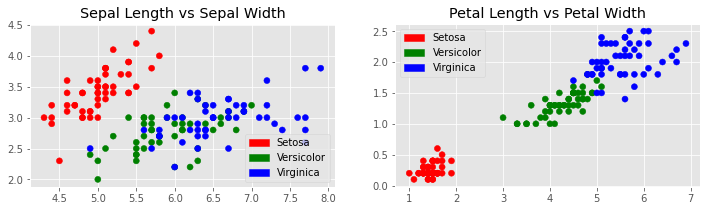

In [61]:
plt.figure(figsize=(12,3))
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')


plt.subplot(1, 2, 1)
plt.scatter(x['Sepal Length'], x['Sepal Width'], c=colors[y['Target']])
plt.title('Sepal Length vs Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1,2,2)
plt.scatter(x['Petal Length'], x['Petal Width'], c= colors[y['Target']])
plt.title('Petal Length vs Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

In [62]:
#just taking clusters as 3 for instance
iris_k_mean_model = KMeans(n_clusters=3)
iris_k_mean_model.fit(x)

KMeans(n_clusters=3)

In [63]:
print (iris_k_mean_model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [64]:
print (iris_k_mean_model.cluster_centers_)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


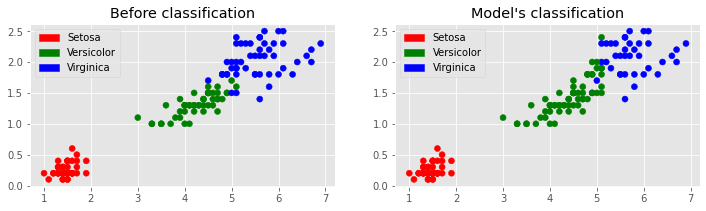

In [65]:

plt.figure(figsize=(12,3))

colors = np.array(['red', 'green', 'blue'])

predictedY = np.choose(iris_k_mean_model.labels_, [1, 0, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']])
plt.title('Before classification')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY])
plt.title("Model's classification")
plt.legend(handles=[red_patch, green_patch, blue_patch])

In [66]:
sm.accuracy_score(predictedY, y['Target'])

0.8933333333333333

In [67]:
#Performance measure

sm.confusion_matrix(predictedY, y['Target'])

array([[50,  0,  0],
       [ 0, 48, 14],
       [ 0,  2, 36]], dtype=int64)